In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, calculate, equilibrium, variables as v
from PT import PT_phase_diagram

In [3]:
# Load the database
db_sgte = Database('CrNb.TDB')

In [4]:
sorted(db_sgte.phases)
pha=sorted(db_sgte.phases)


/srv/conda/envs/notebook/lib/python3.7/site-packages/pycalphad/core/lower_convex_hull.py:136: RuntimeWarning: invalid value encountered in double_scalars
  result_array_GM_values[it.multi_index] = new_energy / molesum


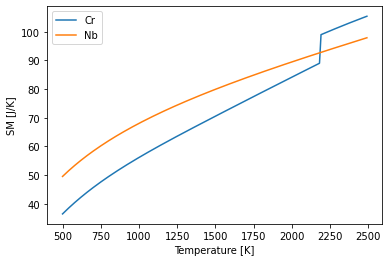

In [6]:

equil_result = equilibrium(db_sgte, ['CR','NB','VA'], pha, {v.X('CR'): 1,v.N: 1,v.P: 101325,v.T: (500, 2500,10),}, output='SM')

equil_result2 = equilibrium(db_sgte, ['CR','NB','VA'], pha, {v.X('NB'): 1,v.N: 1,v.P: 101325,v.T: (500, 2500,10),}, output='SM')

# Squeeze is required because the array corresponding to HM is multidimensional for each T, P, and N where we've calculated the energy
plt.plot(equil_result.T, equil_result.SM.squeeze(),label='Cr')
plt.plot(equil_result2.T, equil_result2.SM.squeeze(),label='Nb')
plt.xlabel("Temperature [K]")
plt.ylabel("SM [J/K]")
plt.legend()
# Same for Gibbs Energy, Enthalpy, Heat Capacity